In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# loading the dataset from excel file to pandas DataFrame
df=pd.read_csv('../data/concated_df.csv')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(1067371, 8)

In [5]:
df.drop(columns=['InvoiceDate'], axis=1)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
# checking for missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df['Customer ID'].mean()

15324.63850435002

In [9]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Customer ID'].fillna(df['Customer ID'].mean(), inplace=True)

In [10]:
df.isna().sum()

Invoice           0
StockCode         0
Description    4382
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [11]:
#Inspired from random online forum
df=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
print(df.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [12]:
#convert mixed data to string
for i in [0,1,2]:
    df[i] = df[i].astype(str)

In [17]:
#Considering Invoice ID, Stock_Code, Description, Inovoice_date and Country in the Model to fit and transform

for i in [0,1,2,4,7]:    
    df[i]=LabelEncoder().fit_transform(df[i])
print(df.head()) 

   0     1     2   3  4     5        6   7
0  0  4551    65  12  0  6.95  13085.0  40
1  0  3701  3431  12  0  6.75  13085.0  40
2  0  3703    36  12  0  6.75  13085.0  40
3  0  1396  3765  48  0   2.1  13085.0  40
4  0   711  4816  24  0  1.25  13085.0  40


In [18]:
#spliting the data, Country as target variable
target=df[7]
data = df.drop(columns=[7])

xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.3)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape) 

(747159, 7) (747159,) (320212, 7) (320212,)


In [19]:
#Scale, fit and transform
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [20]:
df.head()

,0,1,2,3,4,5,6,7
0,0,4551,65,12,0,6.95,13085.0,40
1,0,3701,3431,12,0,6.75,13085.0,40
2,0,3703,36,12,0,6.75,13085.0,40
3,0,1396,3765,48,0,2.1,13085.0,40
4,0,711,4816,24,0,1.25,13085.0,40


# CLASSIFICATION

## Logistic Regression

In [17]:
%%time
model_1=LogisticRegression(max_iter=3000)

model_1.fit( xtrain, ytrain)

CPU times: total: 17min 4s
Wall time: 27min 34s


LogisticRegression(max_iter=3000)

In [18]:
pred_train=model_1.predict(xtrain)
pred_test=model_1.predict(xtest)

In [19]:
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))

training accuracy is  0.9270061660235639
testing accuracy is  0.9273731153111064


## Decision Tree

In [20]:
%%time

model_2=DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_2.fit(xtrain,ytrain)

CPU times: total: 1.41 s
Wall time: 2.47 s


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [21]:
pred_train=model_2.predict(xtrain)
pred_test=model_2.predict(xtest)

In [22]:
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))

training accuracy is  0.9374938935353787
testing accuracy is  0.9379411140119671


## Tuning with HyperParameter

In [23]:
# create a dictionary of hyperparameters for each model
params_lr = {'C': [0.01, 0.1, 1]}
params_dt = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}

In [24]:
# create the models
lr = LogisticRegression(max_iter=3000)
dt = DecisionTreeClassifier()

In [25]:
# create the GridSearchCV objects
grid_lr = GridSearchCV(lr, params_lr, cv=5)
grid_dt = GridSearchCV(dt, params_dt, cv=5)

In [26]:
%%time

# fit the models to the training data
grid_lr.fit(xtrain, ytrain)
grid_dt.fit(xtrain, ytrain)

CPU times: total: 1h 57min 36s
Wall time: 2h 43min 46s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [27]:
# print the best hyperparameters and test accuracy for each model
print("Logistic Regression: best hyperparameters: ", grid_lr.best_params_)
print("test accuracy: ", grid_lr.score(xtest, ytest))

print("Decision Tree: best hyperparameters: ", grid_dt.best_params_)
print("test accuracy: ", grid_dt.score(xtest, ytest))

Logistic Regression: best hyperparameters:  {'C': 1}
test accuracy:  0.9273731153111064
Decision Tree: best hyperparameters:  {'max_depth': 8, 'min_samples_split': 6}
test accuracy:  0.9779458608671755


With 'C' being the best parameter in `Logistic Regression`, In this case, C = 1 strikes a balance between fitting the training data well and avoiding overfitting.



## Comparitive Analysis

In [31]:
# Define the model names and their corresponding test accuracy scores
models = ['Logistic Regression', 'Decision Tree']
accuracies = [0.9273731153111064, 0.9779458608671755]

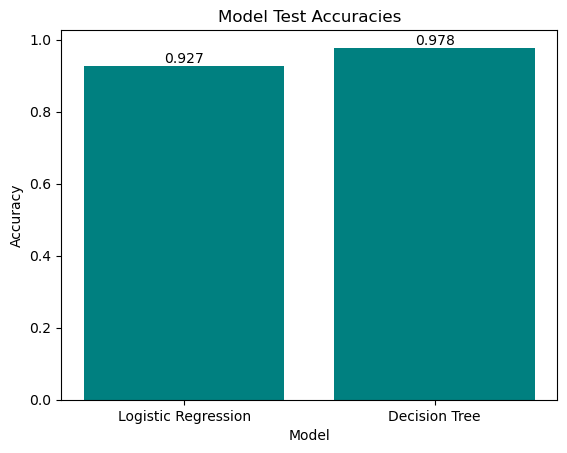

<Figure size 640x480 with 0 Axes>

In [35]:
plt.bar(models, accuracies, color='teal')
plt.title('Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
   plt.text(models[i], accuracies[i], f'{accuracies[i]:.3f}', ha='center', va='bottom')

plt.show()

plt.savefig("../images/supervisedmodelaccuracies.png")